<a class="reference external" href="https://jupyter.designsafe-ci.org/hub/user-redirect/lab/tree/CommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Jupyter_Notebooks/webPortal_4_PostProcess_OpenSeesExpress.ipynb" target="_blank">
<img alt="Try on DesignSafe" src="https://raw.githubusercontent.com/DesignSafe-Training/pinn/main/DesignSafe-Badge.svg" /></a>

# 4 PostProcess Ops-Express
***Take advantage of the interactive nature of the Jupyter environment to visualize output data quantitatively.***

by Silvia Mazzoni, DesignSafe, 2025

In this training session we will visualize the job-output data before copying it over. 

This is an important step because it helps you determine whether the job was run as intended. If not, you can resubmit a job without moving the data, yet.

## Configure python

In [1]:
import matplotlib.pyplot as plt
import numpy

In [2]:
# Local Utilities Library
# you can remove the logic associated with the local path
import sys,os
relativePath = '../OpsUtils'
if os.path.exists(relativePath):
    print("Using local utilities library")
    PathOpsUtils = os.path.expanduser(relativePath)
else:
    PathOpsUtils = os.path.expanduser('~/CommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/OpsUtils')
if not PathOpsUtils in sys.path: sys.path.append(PathOpsUtils)
from OpsUtils import OpsUtils

Using local utilities library


In [3]:
# add the tilda at the beginning of the path to make it absolute
JobOutputFolder = '~/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples'

In [4]:
print('JobOutputFolder',JobOutputFolder)
# list some files:
print('Folder Content:')
display(os.system(f'ls {JobOutputFolder}'))

JobOutputFolder ~/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples
Folder Content:
DataTCL
Ex1a.Canti2D.Push.mp.tcl
Ex1a.Canti2D.Push.mpi.py
Ex1a.Canti2D.Push.mpi4py.py
Ex1a.Canti2D.Push.py
Ex1a.Canti2D.Push.tcl
Ex1a_many.Canti2D.Push.mp.tcl


0

---
## 4. Copy base path for output data from posted path:


In [5]:
basePath = os.path.expanduser(JobOutputFolder)
print('basePath',basePath)

basePath /home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples


In [6]:
os.path.isdir(basePath)

True

In [7]:
os.listdir(basePath)

['DataTCL',
 'Ex1a_many.Canti2D.Push.mp.tcl',
 'Ex1a.Canti2D.Push.mpi4py.py',
 'Ex1a.Canti2D.Push.mp.tcl',
 'Ex1a.Canti2D.Push.mpi.py',
 'Ex1a.Canti2D.Push.py',
 'Ex1a.Canti2D.Push.tcl']

### Visualize the Input File

In [8]:
OpsUtils.show_text_file_in_accordion(basePath,['Ex1a.Canti2D.Push.tcl'])

---
## 5. Plot some analysis results
for any of the above analyses

In [9]:
#pick any case
dataDir = f'{basePath}/DataTCL'
Lcol = 300

In [10]:
print('dataDir',dataDir)
# list some files:
os.system(f'ls {dataDir}/*Lcol{Lcol}.out')

dataDir /home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL
/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/DBase_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/DCol_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/DFree_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/FCol_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-late

0

/home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/DFree_Lcol300.out


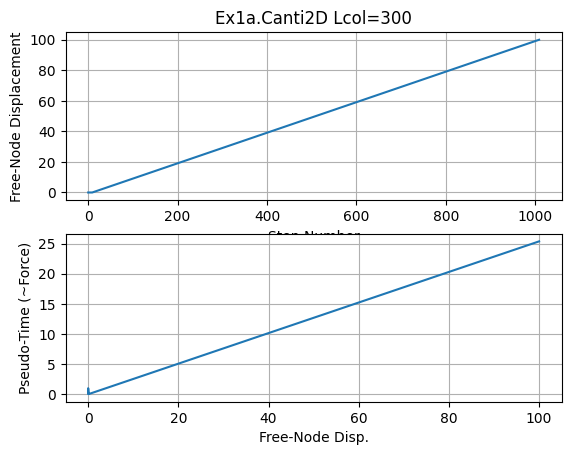

plot saved to /home/jupyter/MyData/tapis-jobs-archive/2025-07-28Z/OpenSees_opensees-express-latest_2025-07-28T20:09:24-b17040ea-8d34-4916-9664-7caaee938467-007/BasicExamples/DataTCL/Response_Lcol300.jpg
End of Run: Ex1a.Canti2D.Push.py.ipynb


In [11]:
plt.close('all')
fname3o = f'DFree_Lcol{Lcol}.out'
fname3 = f'{dataDir}/{fname3o}'
print(fname3)
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title(f'Ex1a.Canti2D Lcol={Lcol}')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
plt.savefig(f'{dataDir}/Response.jpg')
plt.show()
print(f'plot saved to {dataDir}/Response_Lcol{Lcol}.jpg')
print('End of Run: Ex1a.Canti2D.Push.py.ipynb')


In [12]:
print('Done!')

Done!
